In [1]:
# Sample API
import flowx
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

# Define cell-centered variable names
center_vars   = ['pres', 'divv', 'asol', 'eror']
face_vars     = ['velc', 'hvar', 'asol', 'eror']
ins_vars      = ['velc', 'hvar', 'divv', 'pres']
poisson_vars  = ['pres', 'divv']

scalar_info   = dict(tmax = 10, dt = 0.01, Re = 100.0)

simulation_info = dict(time_stepping = 'euler', poisson_solver = 'serial_direct', with_ib = False)

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(pres = ['neumann', 'neumann', 'neumann', 'neumann'])
bc_val_center  = dict(pres = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facex  = dict(velc = [0.0, 0.0, 0.0, 1.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc = [0.0, 0.0, 0.0, 0.0])

gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info,
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound_main(imbound_info=simulation_info)

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

In [3]:
while scalars.time <= scalars.tmax:
    
    ins.advance()
    
    # Display stats
    if scalars.nstep % 10 == 0:
        flowx.io.display_stats(scalars)   

    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.325356703085403e-12
Total poisson time : 0.013075113296508789
Total INS time : 0.015556812286376953
Max, Min, U   : 2.0, -0.06368604136069304
Max, Min, V   : 0.1597809848293595, -0.1597809848293595
Max, Min, P   : 1.809644336873601, -1.8330976847747142
Max, Min, DIV : 1.1102230246251565e-14, -1.6167622796103842e-14


------------ Time = 0.09999999999999999 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.147292970872391e-12
Total poisson time : 0.004130125045776367
Total INS time : 0.004861116409301758
Max, Min, U   : 2.0, -0.1353463117209021
Max, Min, V   : 0.3062757789458833, -0.314163792182704
Max, Min, P   : 1.1720469542368113, -0.8768167067700965
Max, Min, DIV : 7.549516567451064e-15, -6.106226635438361e-15


------------ Time = 0.20000000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.349288581688038

------------ Time = 2.199999999999997 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0986467967193487e-12
Total poisson time : 0.004446983337402344
Total INS time : 0.005059719085693359
Max, Min, U   : 2.0, -0.23042884306803027
Max, Min, V   : 0.3458420390619974, -0.5042841099013805
Max, Min, P   : 1.2859959737048983, -0.6947637802244238
Max, Min, DIV : 6.217248937900877e-15, -7.105427357601002e-15


------------ Time = 2.299999999999995 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1295022146874814e-12
Total poisson time : 0.0042726993560791016
Total INS time : 0.0048787593841552734
Max, Min, U   : 2.0, -0.2313846962663791
Max, Min, V   : 0.3458925126280728, -0.5054388642941756
Max, Min, P   : 1.29120151141663, -0.6906772388196143
Max, Min, DIV : 7.771561172376096e-15, -6.661338147750939e-15


------------ Time = 2.399999999999993 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.364

------------ Time = 4.099999999999957 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.000978187674119e-12
Total poisson time : 0.0049250125885009766
Total INS time : 0.00550079345703125
Max, Min, U   : 2.0, -0.2370246309873405
Max, Min, V   : 0.34628947627699125, -0.5155056536745722
Max, Min, P   : 1.3049932053138213, -0.6882755937756277
Max, Min, DIV : 1.1102230246251565e-14, -5.329070518200751e-15


------------ Time = 4.199999999999955 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.217504261710272e-12
Total poisson time : 0.003857851028442383
Total INS time : 0.004759073257446289
Max, Min, U   : 2.0, -0.23719692400714526
Max, Min, V   : 0.34629860597720064, -0.5157379216088274
Max, Min, P   : 1.305868137509213, -0.6877371317602894
Max, Min, DIV : 1.1102230246251565e-14, -4.884981308350689e-15


------------ Time = 4.299999999999953 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.97

------------ Time = 6.29999999999991 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3501671289676435e-12
Total poisson time : 0.0038340091705322266
Total INS time : 0.004500865936279297
Max, Min, U   : 2.0, -0.23885279179205726
Max, Min, V   : 0.3463991731217728, -0.5183166166983537
Max, Min, P   : 1.306070962607606, -0.6915630316304945
Max, Min, DIV : 6.661338147750939e-15, -5.551115123125783e-15


------------ Time = 6.399999999999908 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9313284950605895e-12
Total poisson time : 0.00399017333984375
Total INS time : 0.004792213439941406
Max, Min, U   : 2.0, -0.23891425346553444
Max, Min, V   : 0.34640145527276267, -0.5183758238001872
Max, Min, P   : 1.3100608128575604, -0.687672110166583
Max, Min, DIV : 7.105427357601002e-15, -5.773159728050814e-15


------------ Time = 6.499999999999906 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3990

------------ Time = 8.499999999999863 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.41759423633708e-12
Total poisson time : 0.007040977478027344
Total INS time : 0.009124994277954102
Max, Min, U   : 2.0, -0.23957219606838362
Max, Min, V   : 0.34642860390671393, -0.5190838807730235
Max, Min, P   : 1.312125244077598, -0.6868117917146852
Max, Min, DIV : 9.769962616701378e-15, -7.105427357601002e-15


------------ Time = 8.599999999999861 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2566076206041464e-12
Total poisson time : 0.003908872604370117
Total INS time : 0.004489898681640625
Max, Min, U   : 2.0, -0.23958657047128984
Max, Min, V   : 0.3464292637683719, -0.5191011869552232
Max, Min, P   : 1.3108970276536254, -0.6880698843865618
Max, Min, DIV : 7.993605777301127e-15, -6.661338147750939e-15


------------ Time = 8.699999999999859 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4219

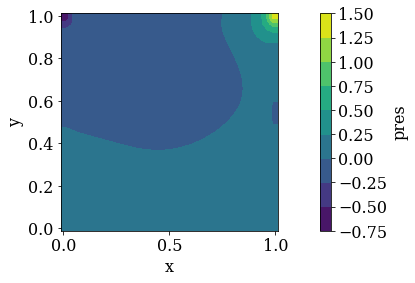

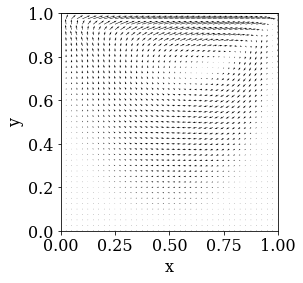

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_vector(gridx,gridy,'velc')